## **Why Graphs**

<div>
<a href="https://ibb.co/5GPfQ5f"><img src="https://i.ibb.co/Xjqvnzv/graph-every.jpg" alt="graph-every"  width="600" border="0" /></a>
</div>

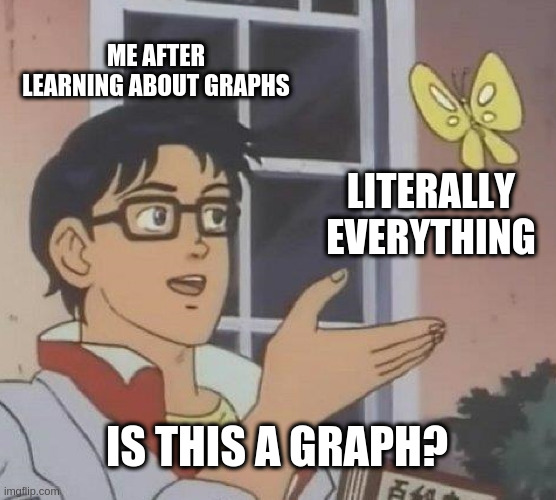

## **Graph Applications**

So the usual categories of Supervised & Unsupervised are not most informative when it comes to graph. Graph NN Applications are categorized into following categories:

### Graph Classification,Regression

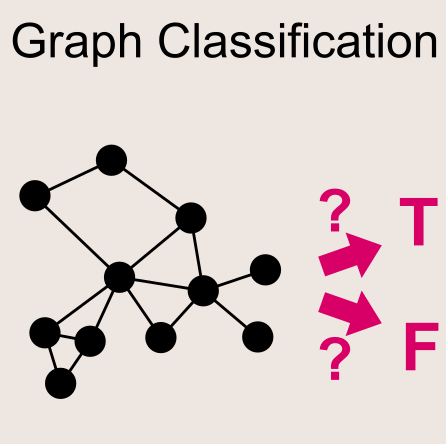

- want to classify the protein molecule, whether is useful or not. Or Fake news detection based upon the sources and links it connected to.
- we might want to build a regression model that could predict that molecule’s toxicity or acidity.
- It is multiple graphs per dataset and each graph is I.I.D finally single label per graph.

### Clustering & Community Detection

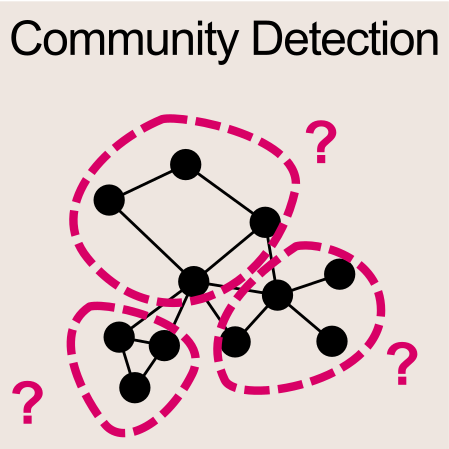

- Single Graph and want to cluster the graph into different regions.
- Detecting different community in Social media network
- can be supervised or unsupervised(no labels)

### Edge Prediction

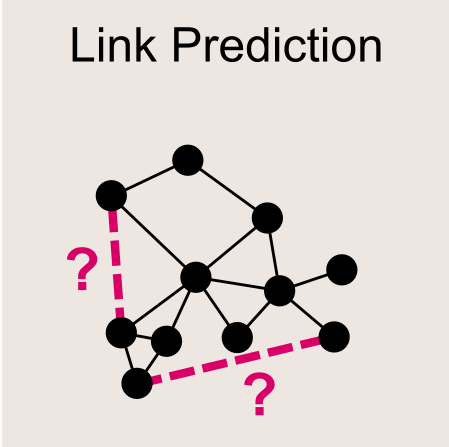

- Used in the Recommendation system to predict whether to recommend this product to user or not.
- Can be used to predict the weight of the edge.

### Node Classification

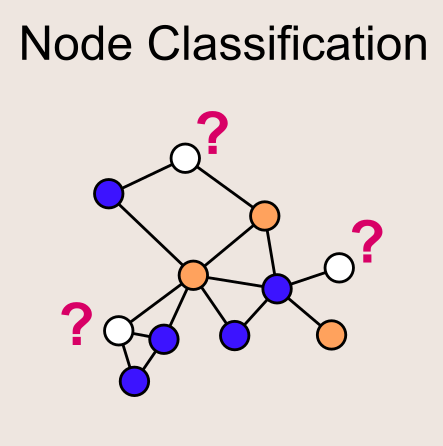

- Predict the node class. In Citation graph, can be used to predict the category of the paper based upon the paper it cited to.
- Useful information is in the links, so can't take this as I.I.D

* [Imports](#first-bullet)
* [Graph Applications](#second-bullet)
* [Graph Terminology](#second-bullet)
* [Graph Representation](#second-bullet)
* [Graph Features](#second-bullet)
* [Pytorch Geometric Intro](#second-bullet)
* [Geometric Dataset & Transformation](#second-bullet)
* [Dataset Sampler and DataLoader](#second-bullet)
* [GNN Layers](#second-bullet)
* [GNN Training](#second-bullet)
* [GNN Custom Model](#second-bullet)
* [References & Resources](#second-bullet)


## **Imports**
<a class="anchor" id="first-bullet"></a>

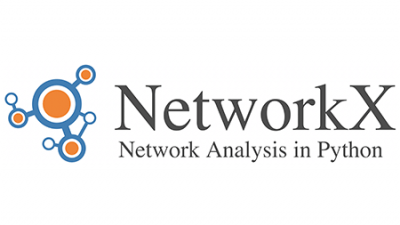

In [1]:
import pandas as pd
import numpy as np
import os
import collections
from IPython.display import Image
import matplotlib.pyplot as plt
import networkx as nx
from networkx.drawing.nx_pydot import write_dot

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## **Graph Terminology**

A graph represents the relations (edges) between a collection of Vertices (nodes).

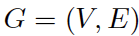

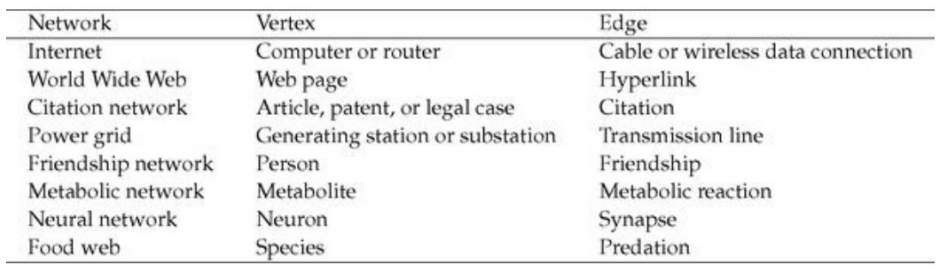

### Type of Edges

1.  Directed - There is direction associated with the arrow. can move in the direction of the arrow only while traversing.
2.  Undirected - There is no direction associated, so can move in either direction.
3.  Weighted - There is weight associated with the edge. It can be Cost,distance etc.
4.  Unweighted - There is no weight associated with the edge or weight is 1.
5.  Self Loop - Edge which connect one vertex with itself.
6.  Multi Edges - There are multiple edges present between two nodes.

In [ ]:
nodes_list = [1,2, 3,4,5,6,7,8]
edge_list = [(1, 2), (1, 3),(5,7),(4,8),(4,6),(3,8),(4,5),(8,5),(2,3),(6,6)]
## Undirected Graph
G = nx.Graph()
G.add_nodes_from(nodes_list)
G.add_edges_from(edge_list)
## Directed Graph
DG = nx.DiGraph()
DG.add_nodes_from(nodes_list)
DG.add_edges_from(edge_list)
## Weighted Graph
weight_edge_list = [(1, 2,3.0), (1, 3,4.0),(5,7,1),(4,8,4.0),(4,6,36.0),(3,8,2.0),(4,5,11.0),(6,6,4.3),(8,5,1.1),(2,3,1.1)]
DG1 = nx.DiGraph() #Graph(), MultiGraph()
DG1.add_nodes_from(nodes_list)
DG1.add_weighted_edges_from(weight_edge_list)
## Multi Graph
multi_edge_list = [(1, 2, 0.5), (1, 2, 0.75), (2, 3, 0.5)]
MG = nx.MultiGraph()
MG.add_weighted_edges_from(multi_edge_list)

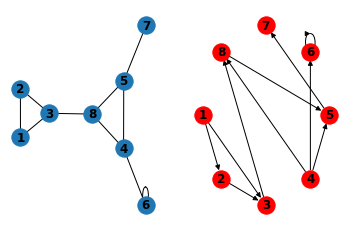

In [ ]:
subax1 = plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')
subax2 = plt.subplot(122)
nx.draw_shell(DG, with_labels=True, font_weight='bold',node_color='red')

{(1, 2): Text(-0.12168680340765745, -0.10776781371362457, '3.0'),
 (1, 3): Text(-0.12335733471321234, -0.1982669884722993, '4.0'),
 (2, 3): Text(-0.08822272875604353, -0.15123051923302672, '1.1'),
 (3, 8): Text(0.022566910172615313, -0.24491237917701847, '2.0'),
 (4, 5): Text(0.0725867376211615, 0.08377289069595065, '11.0'),
 (4, 6): Text(-0.46533795890188556, 0.7445275347346398, '36.0'),
 (4, 8): Text(-0.06581117537126174, 0.12048000255347212, '4.0'),
 (5, 7): Text(0.5644578521369277, -0.3918473418439968, '1'),
 (6, 6): Text(-0.6640264866544185, 0.9999999999999999, '4.3'),
 (8, 5): Text(0.2734249933992523, -0.284802176219857, '1.1')}

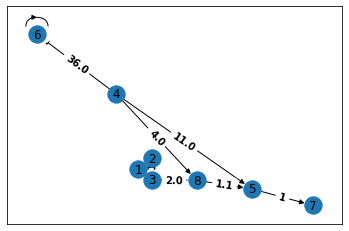

In [ ]:
## Plot weighted Graph
labels = nx.get_edge_attributes(DG1,'weight')
pos=nx.spring_layout(DG1)
nx.draw_networkx(DG1,pos)
nx.draw_networkx_edge_labels(DG1,pos, edge_labels=labels,font_weight='bold')

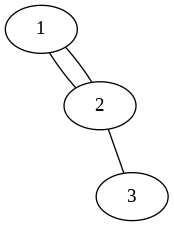

In [ ]:
write_dot(MG,'multi.dot') ## save multiGraph
!neato -T png multi.dot > multi.png
Image('multi.png')

### Type of Graphs

1.  Homogeneous Graph - Normal graphs where are all the nodes are of same type
3.  Bipartite Graph - It is the Type of the Hypergraph/Heterogeneous graph, where nodes divides into two distinct sets.
3. HyperGraph/Heterogeneous Graph/Multiplex Graph -  certain edges only connect nodes of certain types. For e.g. In biomedical graph, there might be one type of node representing proteins, one type of representing drugs, and one type representing diseases.where nodes are present in levels and some edges connecting nodes from level1 nodes to level2 nodes.

Nodes: 10
Edges: 15


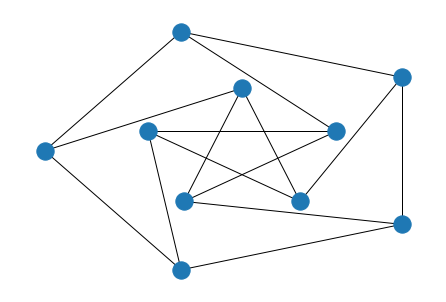

In [ ]:
## Homogeneous Graph
G = nx.petersen_graph()
print('Nodes:',G.number_of_nodes())
print('Edges:',G.number_of_edges())
nx.draw_shell(G, nlist=[range(5, 10), range(5)],  font_weight='bold',cmap=plt.cm.Blues)

#### Bipartite Graph

<div>
<a href="https://ibb.co/0JmC7tm"><img src="https://i.ibb.co/dKjPTgj/relation.png" alt="relation" border="0" /></a>
</div>

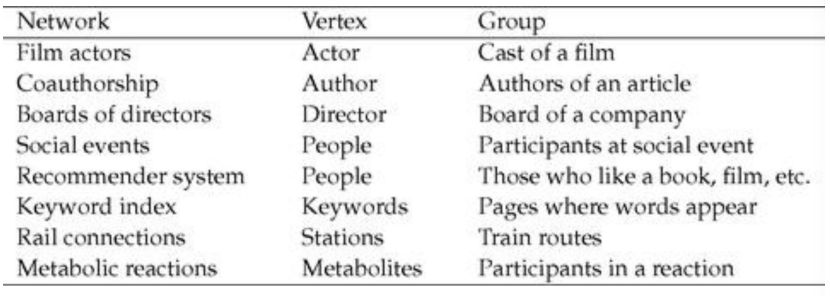

<Figure size 648x648 with 0 Axes>

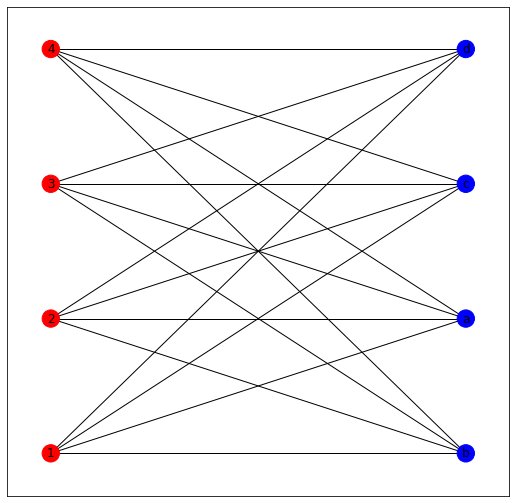

In [ ]:
color_list = ['r','r', 'r', 'r', 'b', 'b', 'b', 'b']
G = nx.complete_bipartite_graph([1,2,3,4],['a','b','c','d'])
bottom_nodes, top_nodes = nx.bipartite.sets(G)
pos = dict()
color = []
pos.update( (n, (1, i)) for i, n in enumerate(bottom_nodes) ) # put nodes from X at x=1
pos.update( (n, (2, i)) for i, n in enumerate(top_nodes) )
plt.figure(figsize =(9, 9))
nx.draw_networkx(G,pos=pos, with_labels = True, node_color =color_list)

#### Multiplex Graph

This can represent the Transportation System of the City.

One level Represent the people travelling in Train.

Other level represent the people travelling in Buses.

And there is connection means some people shift from one medium to another.


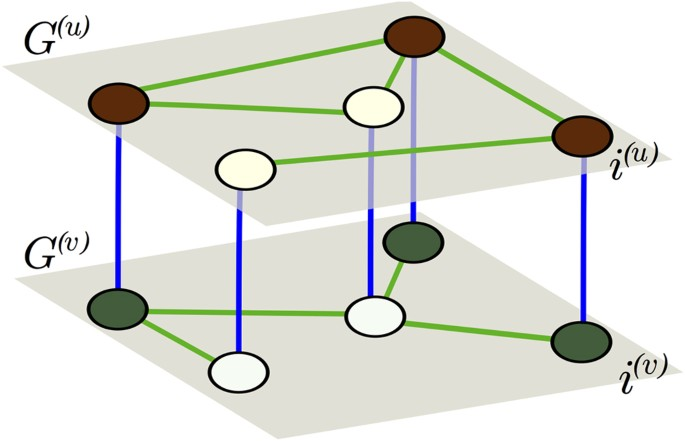

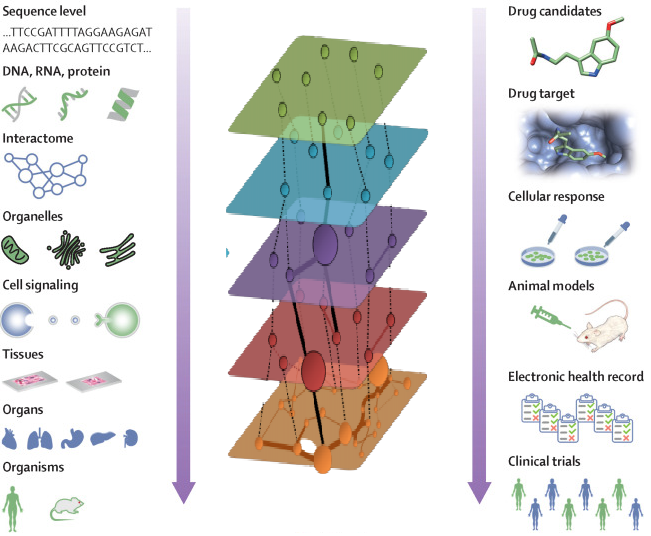

## **Graph Property**

### Graph Isomorphism

Is both graph are Isomorphic:  True


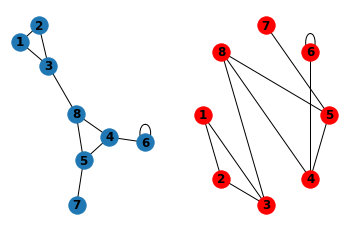

In [ ]:
## Graph isomorphism
subax1 = plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')
subax2 = plt.subplot(122)
nx.draw_shell(G, with_labels=True, font_weight='bold',node_color='red')
GM = nx.algorithms.isomorphism.GraphMatcher(G, G)
print('Is both graph are Isomorphic: ',GM.is_isomorphic())

### Other property

- Clique: All the vertices are directly connected to each other.
- DAG: directed Acyclic Graph with no directed cycles.
- Tree: It is the Graph with no cycles.

<div>
<a href="https://ibb.co/GMbxfWx"><img src="https://i.ibb.co/1XwvYrv/type.png" alt="type" border="0" /></a>
</div>

### Dependence

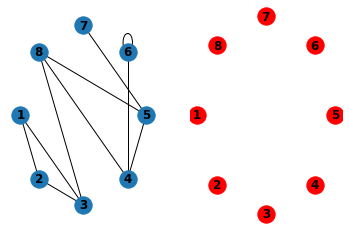

In [ ]:
## Importance of edges
subax1 = plt.subplot(121)
nx.draw_shell(G, with_labels=True, font_weight='bold')
subax2 = plt.subplot(122)
G.remove_edges_from(edge_list)
nx.draw_shell(G, with_labels=True, font_weight='bold',node_color='red')

## **Graph Representation**

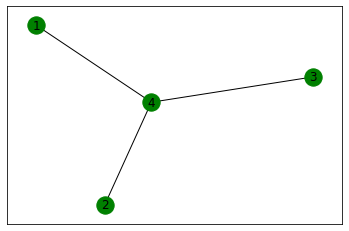

In [ ]:
G = nx.Graph()
## list of tuples
edge_list=[(1, 4), (2, 4), (3, 4) ]
G.add_edges_from(edge_list)
nx.draw_networkx(G, with_labels = True, node_color ='green')

In [ ]:
## Adjacency Matrix Undirected
print(G.nodes)
nx.adjacency_matrix(G).todense()

[1, 4, 2, 3]


matrix([[0, 1, 0, 0],
        [1, 0, 1, 1],
        [0, 1, 0, 0],
        [0, 1, 0, 0]])

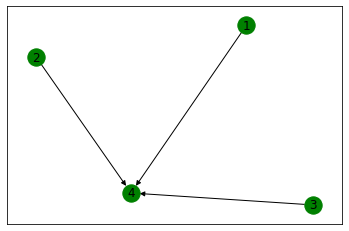

In [ ]:
G = nx.DiGraph()
## list of tuples
edge_list=[(1, 4), (2, 4), (3, 4) ]
G.add_edges_from(edge_list)
nx.draw_networkx(G, with_labels = True, node_color ='green')

In [ ]:
## Adjacency Matrix Directed
nx.adjacency_matrix(G).todense()

matrix([[0, 1, 0, 0],
        [0, 0, 0, 0],
        [0, 1, 0, 0],
        [0, 1, 0, 0]])

- Undirected graph Matrix would be Symmetric
- Directed graph Matrix would be Asymmetric

## **Graph Features**

### Node level Features

#### Degree Centrality

- Node degree: Simply counts the number of edges conected to a node. It measures how many neighbors a node has.
- Node Indegree/Outdegree: count of incoming and outgoing edges to a node.

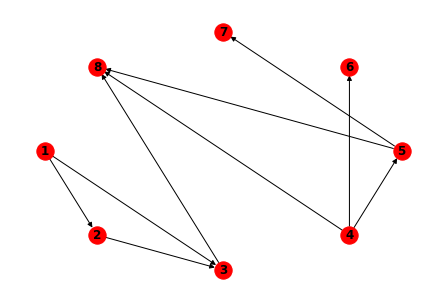

In [ ]:
nodes_list = [1,2, 3,4,5,6,7,8]
edge_list = [(1, 2), (1, 3),(5,7),(4,8),(4,6),(3,8),(4,5),(5,8),(2,3)]
## directed Graph
DG = nx.DiGraph()
DG.add_nodes_from(nodes_list)
DG.add_edges_from(edge_list)
nx.draw_shell(DG, with_labels=True, font_weight='bold',node_color='red')

In [ ]:
## Node degree
print("Node Degree")
for v in DG:
    if DG.degree(v)>=1:
      print(f"{v:4} {DG.degree(v):6}")

Node Degree
   1      2
   2      2
   3      3
   4      3
   5      3
   6      1
   7      1
   8      3


In [ ]:
## Node Indegree
print("Node InDegree")
for v in DG:
    print(f"{v:4} {DG.in_degree(v):6}")

Node InDegree
   1      0
   2      1
   3      2
   4      0
   5      1
   6      1
   7      1
   8      3


#### Other Centrality

- Degree centrality: Based on the assumption that important nodes have many connections.
- Closeness centrality: Based on the assumption that important nodes are close to other nodes.
- Betweenness Centrality: Based on the assumption that important nodes connect other nodes.
- Pagerank centrality: It assigns a score of importance to each node. Here, Important nodes are those with many inlinks from other important nodes.

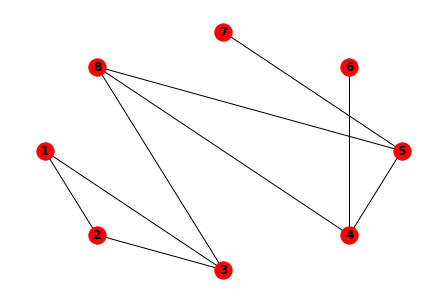

In [2]:
nodes_list = [1,2, 3,4,5,6,7,8]
edge_list = [(1, 2), (1, 3),(5,7),(4,8),(4,6),(3,8),(4,5),(5,8),(2,3)]
## directed Graph
G = nx.Graph()
G.add_nodes_from(nodes_list)
G.add_edges_from(edge_list)
nx.draw_shell(G, with_labels=True, font_weight='bold',node_color='red')

image.png

In [ ]:
## Degree Centrality : It Assume if more number of neighbour nodes then it is important.
# deg(8) = 3/8-1 = 0.43
centrality = nx.degree_centrality(G)
sorted([(v, round(c,2)) for v, c in centrality.items()],key=lambda item: item[1],reverse=True)[:6]

[(3, 0.43), (4, 0.43), (5, 0.43), (8, 0.43), (1, 0.29), (2, 0.29)]

image.png

In [ ]:
## Closeness Centrality : it Assume if you can reach all the nodes in less number of Hops then that node is important.
# close(8) = 8-1 / 2 +2 + 1 + 1 + 1 + 2 + 2 = 7 / 11 = 0.64
centrality = nx.closeness_centrality(G)
sorted([(v, round(c,2)) for v, c in centrality.items()],key=lambda item: item[1],reverse=True)[:6]

[(8, 0.64), (3, 0.54), (4, 0.54), (5, 0.54), (1, 0.39), (2, 0.39)]

image.png

In [3]:
## Betweenness Centrality: It measure the node falling in the shortest paths of other pairs of nodes.
# between(8) = (1,4) + (1,5) + (1,6) + (1,7) + (2,4) + (2,5) + (2,6) + (2,7) + (3,4) + (3,5) + (3,6) + (3,7) = 12
print('shortest path',nx.shortest_path (G ,1 , 6 ))
centrality = nx.betweenness_centrality(G,normalized=False)
sorted([(v, round(c,2)) for v, c in centrality.items()],key=lambda item: item[1],reverse=True)[:6]

shortest path [1, 3, 8, 4, 6]


[(8, 12.0), (3, 10.0), (4, 6.0), (5, 6.0), (1, 0.0), (2, 0.0)]

- Calculate the Principal EigenVector of the Indegree Matrix s = M.s
- Used Power iteration method instead of Matrix inverse

In [ ]:
## Pagerank Centrality
centrality = nx.pagerank(DG)
sorted([(v, round(c,2)) for v, c in centrality.items()],key=lambda item: item[1],reverse=True)[:6]

[(8, 0.29), (3, 0.19), (7, 0.11), (2, 0.1), (5, 0.09), (6, 0.09)]

### Graph Level Features

#### Degree Histogram

- Degree Histogram: histogram of the degree distribution

Zachary's karate club is a social network of a university karate club. The network captures 34 members of a karate club, documenting links between pairs of members who interacted outside the club. During the study a conflict arose between the administrator "John A" and instructor "Mr. Hi" (pseudonyms), which led to the split of the club into two.

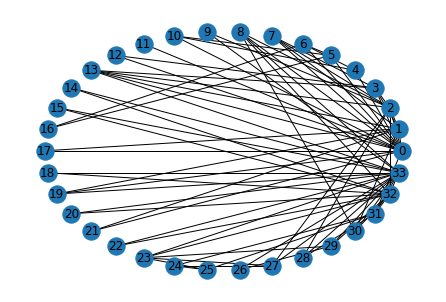

In [ ]:
G = nx.karate_club_graph()
nx.draw_circular(G, with_labels=True)

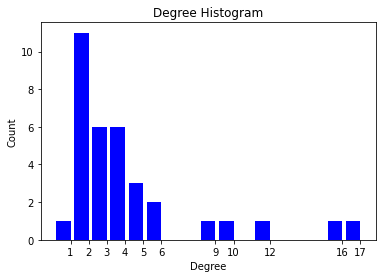

In [ ]:
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
_=plt.bar(deg, cnt, width=0.80, color='b')
_=plt.title("Degree Histogram")
_=plt.ylabel("Count")
_=plt.xlabel("Degree")
_=ax.set_xticks([d + 0.4 for d in deg])
_=ax.set_xticklabels(deg)

#### Cycle Histogram

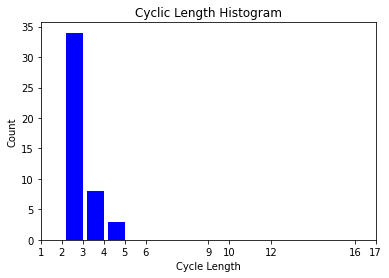

In [ ]:
cycle = sorted(nx.cycle_basis(G))
cycle_len={}
for i in cycle:
  cycle_len[len(i)] = cycle_len.get(len(i),0) + 1

fig, ax = plt.subplots()
_=plt.bar(cycle_len.keys(), cycle_len.values(), width=0.80, color='b')
_=plt.title("Cyclic Length Histogram")
_=plt.ylabel("Count")
_=plt.xlabel("Cycle Length")
_=ax.set_xticks([d + 0.4 for d in deg])
_=ax.set_xticklabels(deg)

-  LHN similarity: Measure the ratio between the actual number of observed paths and the number of expected paths between two nodes. we draw a random graph with the same set of degrees as our given graph.
- Connected Components Ratio: Ratio of number of nodes in the Largest Weakly/strongly Connected component by total number of nodes.
- Motif/Subgraph Count: Count of different 3,4,higher Motifs found in the Graph

## **Motif & SubGraph**

#### Directed Motifs

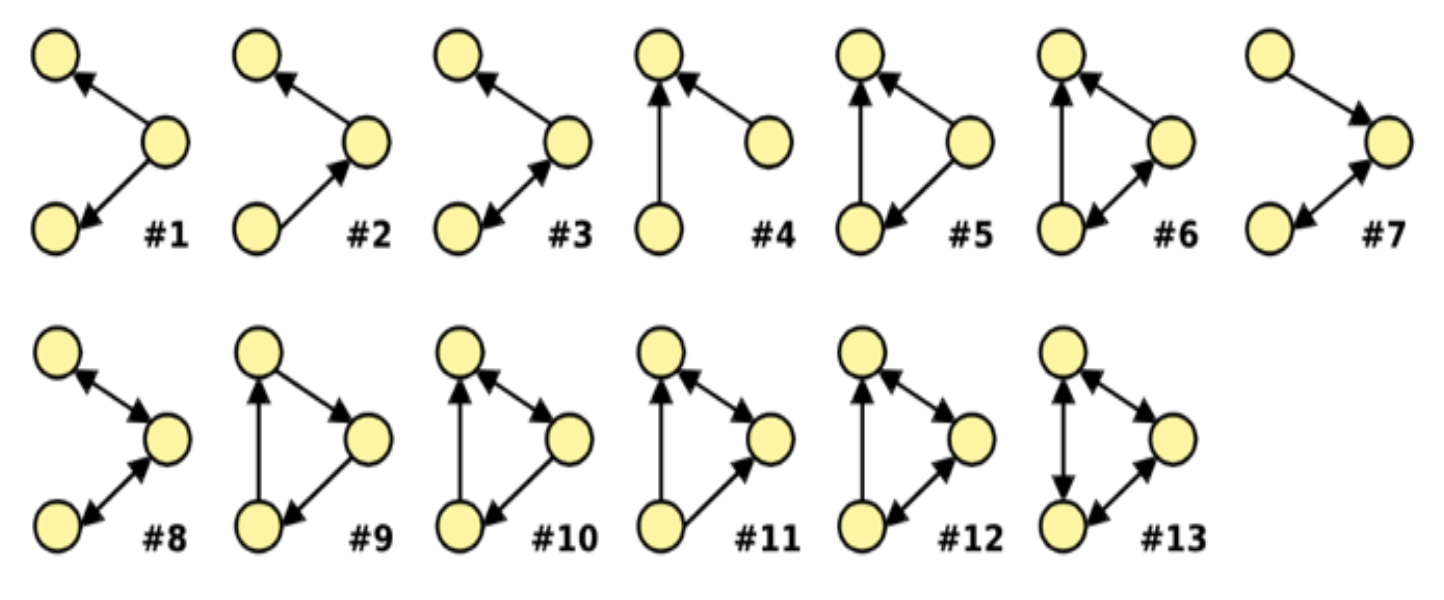

In [ ]:
import networkx as nx
import numpy as np
import itertools

## We define each S* motif as a directed graph in networkx
motifs = {
    'S1': nx.DiGraph([(1,2),(1,3)]), #1
    'S2': nx.DiGraph([(1,2),(2,3)]), #2
    'S4': nx.DiGraph([(1,2),(3,2)]), #4
    'S5': nx.DiGraph([(1,2),(1,3),(2,3)]), #5
    'S9': nx.DiGraph([(1,2),(2,3),(3,1)]) #9
    }

def mcounter(gr, mo):

    mcount = dict(zip(mo.keys(), list(map(int, np.zeros(len(mo))))))
    nodes = gr.nodes()

    triplets = list(itertools.product(*[nodes, nodes, nodes]))
    triplets = [trip for trip in triplets if len(list(set(trip))) == 3]
    triplets = map(list, map(np.sort, triplets))
    u_triplets = []
    [u_triplets.append(trip) for trip in triplets if not u_triplets.count(trip)]

    for trip in u_triplets:
        sub_gr = gr.subgraph(trip)
        mot_match = list(map(lambda mot_id: nx.is_isomorphic(sub_gr, mo[mot_id]), motifs.keys()))
        match_keys = [list(mo.keys())[i] for i in range(len(mo)) if mot_match[i]]
        if len(match_keys) == 1:
            mcount[match_keys[0]] += 1

    return mcount

In [ ]:
mcounter(DG,motifs)

{'S1': 3, 'S2': 3, 'S4': 2, 'S5': 2, 'S9': 0}

#### Undirected Motifs

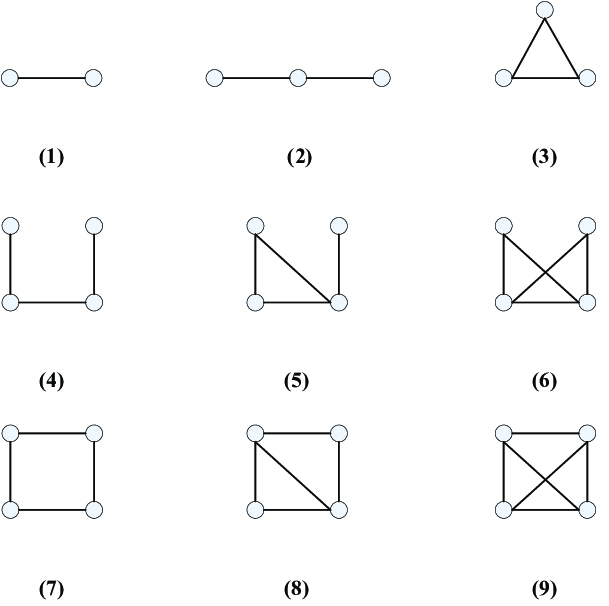

- Clustering coefficient: It measures how tightly clustered a node’s neighborhood is.It is the ratio between the actual number of triangles and the total possible number of triangles within a node neighborhood
- Motifs & Ego Graph: Rather than just counting triangles,
we could consider more complex structures, such as cycles of particular length, So it is a counts of how often these different motifs occur in their ego graph.

In [ ]:
## Clustering Coefficients
clustering = nx.clustering(G)
sorted([(v, round(c,2)) for v, c in clustering.items()],key=lambda item: item[1],reverse=True)

[(7, 1.0),
 (12, 1.0),
 (14, 1.0),
 (15, 1.0),
 (16, 1.0),
 (17, 1.0),
 (18, 1.0),
 (20, 1.0),
 (21, 1.0),
 (22, 1.0),
 (26, 1.0),
 (3, 0.67),
 (4, 0.67),
 (10, 0.67),
 (29, 0.67),
 (13, 0.6),
 (5, 0.5),
 (6, 0.5),
 (8, 0.5),
 (30, 0.5),
 (23, 0.4),
 (1, 0.33),
 (19, 0.33),
 (24, 0.33),
 (25, 0.33),
 (28, 0.33),
 (2, 0.24),
 (31, 0.2),
 (32, 0.2),
 (27, 0.17),
 (0, 0.15),
 (33, 0.11),
 (9, 0),
 (11, 0)]

#### Edge Motifs

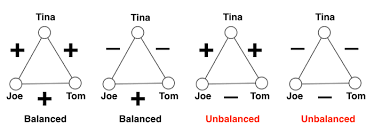

## **Community & Clustering**

#### Hierarchical Clustering

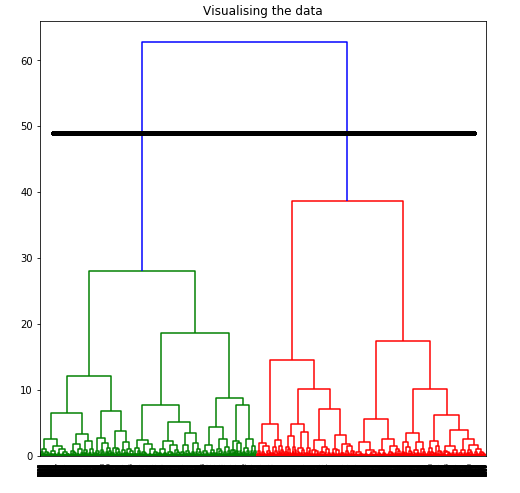

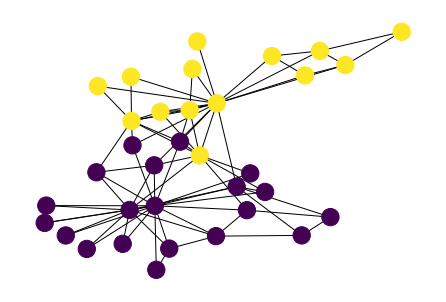

In [ ]:
n=34
pcc_longueurs=list(nx.all_pairs_shortest_path_length(G))
distances=np.zeros((n,n))
# distances[i, j] is the length of the shortest path between i and j
for i in range(n):
    for j in range(n):
        distances[i, j] = pcc_longueurs[i][1][j]

from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=2,linkage='average',affinity='precomputed').fit_predict(distances)

nx.draw(G,  node_color = clustering)

#### Edge Cut & Motif Cut

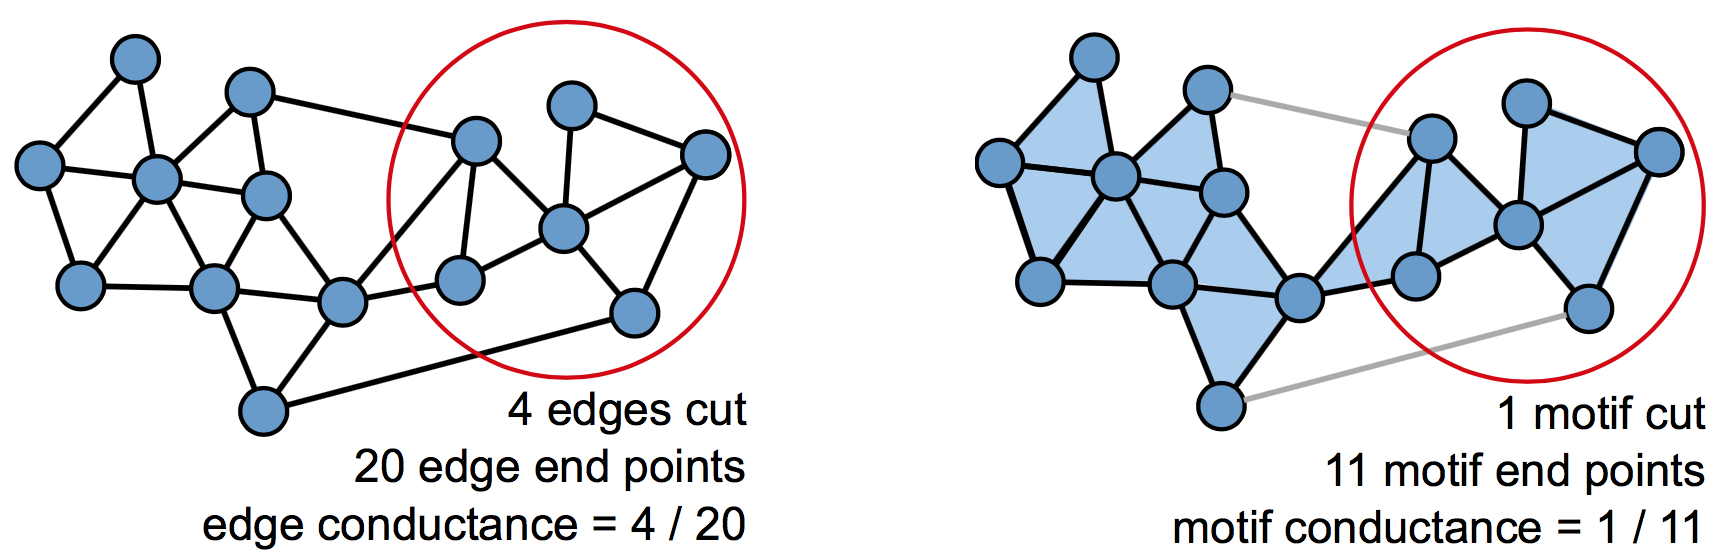

## **Graph Neural Network**

- Using Above Node and edge Features in a Neural network
- Common Machine Learning Task
  - Node Classification
  - Edge Prediction
  - Graph Classification/Regression
  - Graph Generation

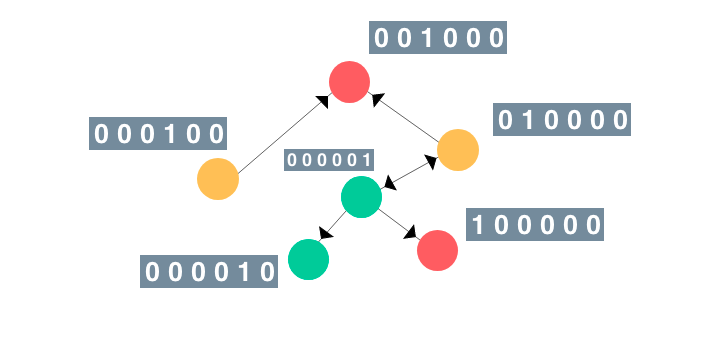

## **Pytorch Geometric**

It is a library built upon PyTorch to easily write and train Graph Neural Networks. It is written & open sourced by Matthias Fey, who is a phd student at university of Dortmund.

In [ ]:
#@title
import torch

def format_pytorch_version(version):
    return version.split('+')[0]

def format_cuda_version(version):
    return 'cu' + version.replace('.', '')

TORCH_version = torch.__version__
TORCH = format_pytorch_version(TORCH_version)
CUDA_version = torch.version.cuda
CUDA = format_cuda_version(CUDA_version)

In [ ]:
#@title
!pip install torch-scatter -f https://pytorch-geometric.com/whl/torch-{TORCH}+{CUDA}.html
!pip install torch-sparse -f https://pytorch-geometric.com/whl/torch-{TORCH}+{CUDA}.html
!pip install torch-cluster -f https://pytorch-geometric.com/whl/torch-{TORCH}+{CUDA}.html
!pip install torch-spline-conv -f https://pytorch-geometric.com/whl/torch-{TORCH}+{CUDA}.html
!pip install torch-geometric

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://pytorch-geometric.com/whl/torch-1.12.1+cu113.html
     |████████████████████████████████| 7.9 MB 2.7 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://pytorch-geometric.com/whl/torch-1.12.1+cu113.html
     |████████████████████████████████| 3.5 MB 1.9 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://pytorch-geometric.com/whl/torch-1.12.1+cu113.html
  Using cached https://data.pyg.org/whl/torch-1.12.0%2Bcu113/torch_cluster-1.6.0-cp37-cp37m-linux_x86_64.whl (2.4 MB)
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://pytorch-geometric.com/whl/torch-1.12.1+cu113.html
  Using cached https://data.pyg.org/whl/torch-1.12.0%2Bcu113/torch_s

In [ ]:
# import torch
import torch_geometric
torch_geometric.__version__

'2.1.0'

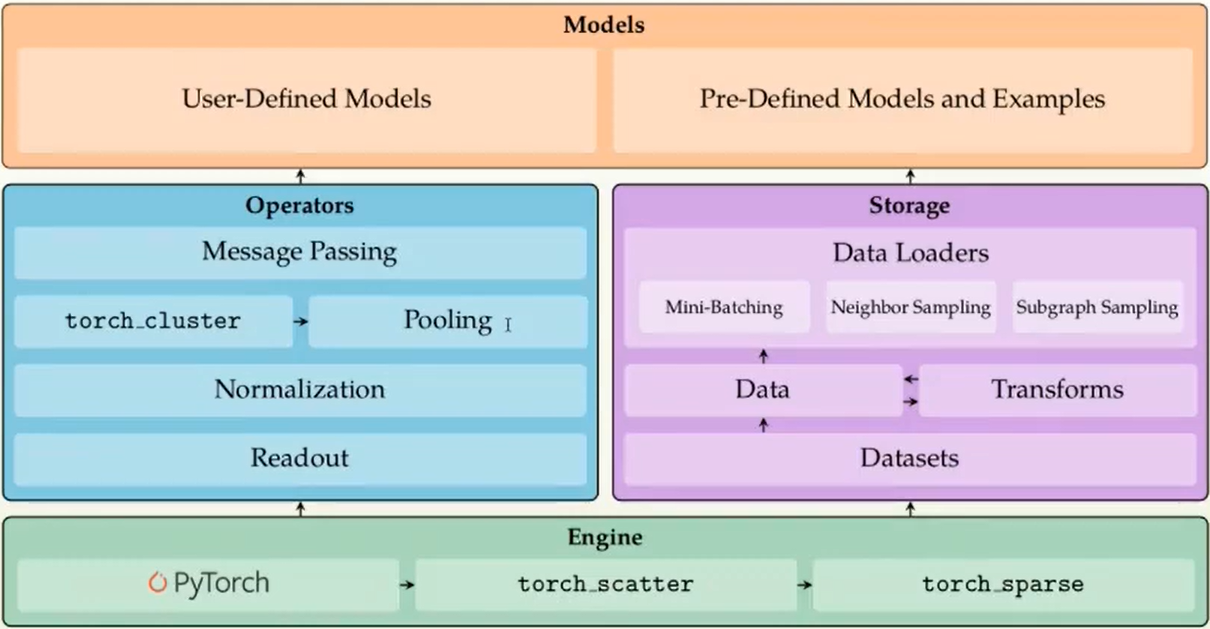

## **Geometric Dataset & Transformation**

- torch_geometric.Data - for creating and managing the collection of graphs
- torch_geometric.Dataset - module with collection of Datasets.
- torch_geometric.transforms - for applying the different transformations like Convert to Undirected graph, LocalDegreeProfile, Adding/removing self loops etc. [link](https://pytorch-geometric.readthedocs.io/en/latest/modules/transforms.html)


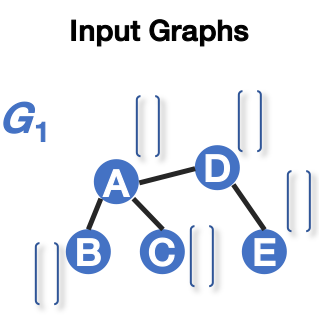

In [ ]:
features = torch.rand((20, 8), dtype=torch.float)
node_from = np.random.choice(20, 50)
node_to = np.random.choice(20, 50)
edges = torch.tensor([node_from, node_to])
ys = torch.rand((20)).round().long()

In [ ]:
graph = torch_geometric.data.Data(x=features, edge_index=edges, y=ys)
print(graph)
print(f'Number of nodes Features: {graph.num_node_features}')
print(f'Number of nodes: {graph.num_nodes}')
print(f'Number of edges: {graph.num_edges}')
print(f'Has isolated nodes: {graph.has_isolated_nodes()}')
print(f'Has self-loops: {graph.has_self_loops()}')
print(f'Is undirected: {graph.is_undirected()}')

Data(x=[20, 8], edge_index=[2, 50], y=[20])
Number of nodes Features: 8
Number of nodes: 20
Number of edges: 50
Has isolated nodes: True
Has self-loops: True
Is undirected: False


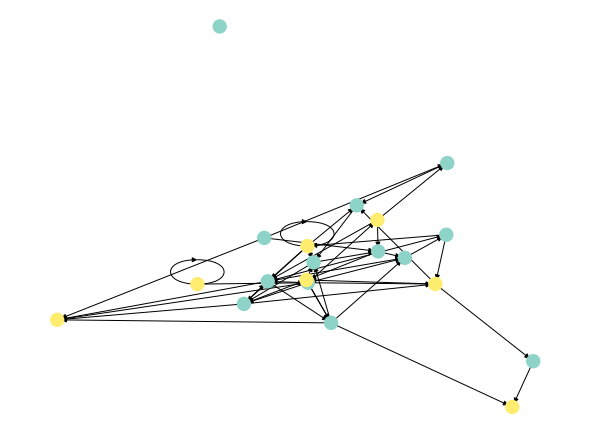

In [ ]:
from torch_geometric.utils import to_networkx
def plot_graph(graph):
  vis = to_networkx(graph)
  node_labels = graph.y.numpy()
  plt.figure(1,figsize=(8,6)) 
  nx.draw(vis, cmap=plt.get_cmap('Set3'),node_color = node_labels,node_size=70,linewidths=6)
  plt.show()
plot_graph(graph)

### Transformation

In [ ]:
transform = torch_geometric.transforms.Compose([
    # torch_geometric.transforms.AddTrainValTestMask('train_rest', num_val=5, num_test=5),
    torch_geometric.transforms.NormalizeFeatures(),
    torch_geometric.transforms.RemoveIsolatedNodes(),
    torch_geometric.transforms.AddSelfLoops(),
])
transform(graph)

Data(x=[19, 8], edge_index=[2, 68], y=[19])

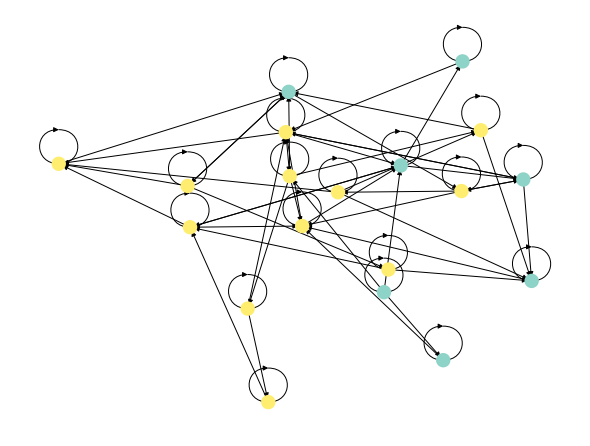

In [ ]:
plot_graph(graph)

Torch Geometric comes with 100s of preloaded Dataset. You can find the list [here](https://pytorch-geometric.readthedocs.io/en/latest/modules/datasets.html)

In [ ]:
torch_geometric.datasets.__all__[:10]

['KarateClub',
 'TUDataset',
 'GNNBenchmarkDataset',
 'Planetoid',
 'NELL',
 'CitationFull',
 'CoraFull',
 'Coauthor',
 'Amazon',
 'PPI']

- The Cora dataset consists of 2708 scientific publications classified into one of seven classes. These classes are Neural_Networks, Probabilistic_Methods,Genetic_Algorithms, Theory, Case_Based, Reinforcement_Learning,Rule_Learning. This dataset contains only a single, undirected citation graph.
- Aids Dataset consists of 2000 different graphs representing the small part of protein structure. It is labelled either 0 or 1.

In [ ]:
from torch_geometric.datasets import Planetoid,TUDataset
cora = Planetoid(root='/tmp/Cora', name='Cora')
aids = TUDataset(root="/tmp/Aids", name="AIDS")

Processing...
Done!
Extracting /tmp/Aids/AIDS/AIDS.zip
Processing...
Done!


In [ ]:
print(cora[0])
print('# of graphs:', len(cora))
print('Number of classes: ',cora.num_classes)
print('Node features ',cora.num_node_features)
print('node features:',cora[0].x)
print('node label:',cora[0].y)
print('edges:',cora[0].edge_index)

Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])
# of graphs: 1
Number of classes:  7
Node features  1433
node features: tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
node label: tensor([3, 4, 4,  ..., 3, 3, 3])
edges: tensor([[   0,    0,    0,  ..., 2707, 2707, 2707],
        [ 633, 1862, 2582,  ...,  598, 1473, 2706]])


In [ ]:
print(aids[0])
print('# of graphs:', len(aids))
print('Number of classes: ',aids.num_classes)
print('Node features ',aids.num_node_features)
print('node features:',aids[0].x)
print('node label:',aids[0].y)
print('edges:',aids[0].edge_index)

Data(edge_index=[2, 106], x=[47, 38], edge_attr=[106, 3], y=[1])
# of graphs: 2000
Number of classes:  2
Node features  38
node features: tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [1., 0., 0.,  ..., 0., 0., 0.],
        [1., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [1., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [1., 0., 0.,  ..., 0., 0., 0.]])
node label: tensor([0])
edges: tensor([[ 0,  0,  1,  1,  1,  2,  2,  2,  3,  3,  3,  4,  4,  4,  5,  5,  6,  6,
          7,  7,  7,  8,  8,  8,  9,  9, 10, 11, 11, 12, 12, 12, 12, 13, 13, 13,
         14, 14, 14, 15, 15, 15, 15, 16, 16, 17, 17, 18, 18, 18, 18, 19, 19, 19,
         20, 20, 21, 21, 21, 21, 22, 23, 23, 23, 24, 24, 25, 26, 27, 28, 28, 28,
         28, 29, 29, 30, 30, 31, 31, 31, 31, 32, 32, 32, 33, 33, 34, 34, 34, 34,
         35, 36, 36, 36, 37, 37, 38, 39, 40, 41, 42, 43, 44, 45, 45, 46],
        [ 1,  5,  0,  2, 11,  1,  3, 14,  2,  4,  6,  3,  5,  9,  0,  4,  3,  7,
          6,  8, 

### Sampler

- NeighborSampler - if want to to sample from the Large Graph and then do the training on the subpart. There are other sample scheme like RandomSampler

In [ ]:
sampler = torch_geometric.data.NeighborSampler(cora[0].edge_index, sizes=[3,10], batch_size=4, shuffle=False)

/usr/local/lib/python3.7/dist-packages/torch_geometric/deprecation.py:13: UserWarning: 'data.NeighborSampler' is deprecated, use 'loader.NeighborSampler' instead
  warnings.warn(out)


In [ ]:
print('Number of samples',len(sampler))
for i in sampler:
  print(i)
  break

Number of samples 677
(4, tensor([   0,    1,    2,    3, 2582,  633, 1862,  654,  652, 1666,  332, 1454,
        2544, 1986, 1166, 1866, 1701,  926,  470, 2381, 1662,  606,   49,   48,
        2615, 2122, 2003,  665]), [EdgeIndex(edge_index=tensor([[ 4,  5,  6,  2,  7,  8,  1,  9, 10, 11, 13, 12,  0,  6, 14,  0, 15, 16,
          0,  4, 16, 17,  1,  1, 18,  2, 19, 20, 21, 22, 23,  2, 24, 25, 26, 27,
          2,  3],
        [ 0,  0,  0,  1,  1,  1,  2,  2,  2,  2,  2,  3,  4,  4,  4,  5,  5,  5,
          6,  6,  6,  6,  7,  8,  8,  9,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10,
         11, 12]]), e_id=tensor([10306,  2569,  7565,     6,  2643,  2640,     3,  6597,  1382,  5774,
         8132, 10222,     2,  7568,  4551,     0,  7578,  6751,     1, 10308,
         6787,  3637,     5,     4,  1932,     9,  9728,  6583,  2484,   183,
          178,     7, 10368,  8757,  8262,  2688,     8,    11]), size=(28, 13)), EdgeIndex(edge_index=tensor([[ 4,  5,  6,  2,  7,  8,  9, 10, 11, 12],
    

### DataLoader

- DataLoader - If want to create the batches of graph to be fed into the Network

In [ ]:
loader = torch_geometric.loader.DataLoader(aids, batch_size=32, shuffle=True)

In [ ]:
for data in loader:
  print(data.num_graphs)
  break

32


## **GNN Layers**

Pytorch Geometric have already builtin layers from the ideas present in different Graph NN Papers. here are the [list of layers](https://pytorch-geometric.readthedocs.io/en/latest/modules/nn.html)

### SAGEConv
[GraphSage](https://arxiv.org/abs/1706.02216)(2017) is one of the first papers to intoduce the neural message passing scheme between nodes to learn the node embedding. SAGEConv is based upon that.



Here Current node uses the neighbors to update its own node information. and this will repeat over k times. So after the k times The current node have information aggregated from k hops.

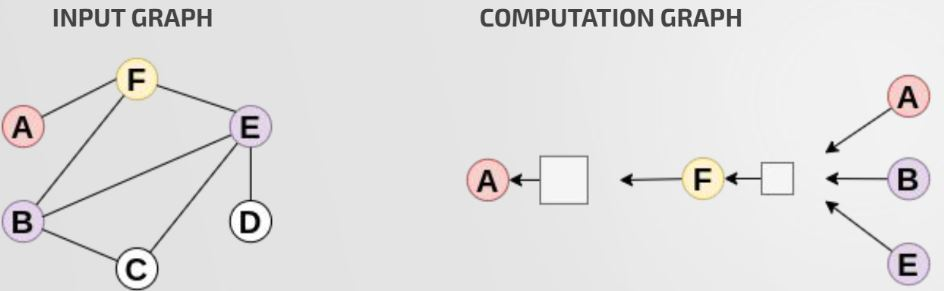

Here Wk and Bk are shared parameters among all the nodes

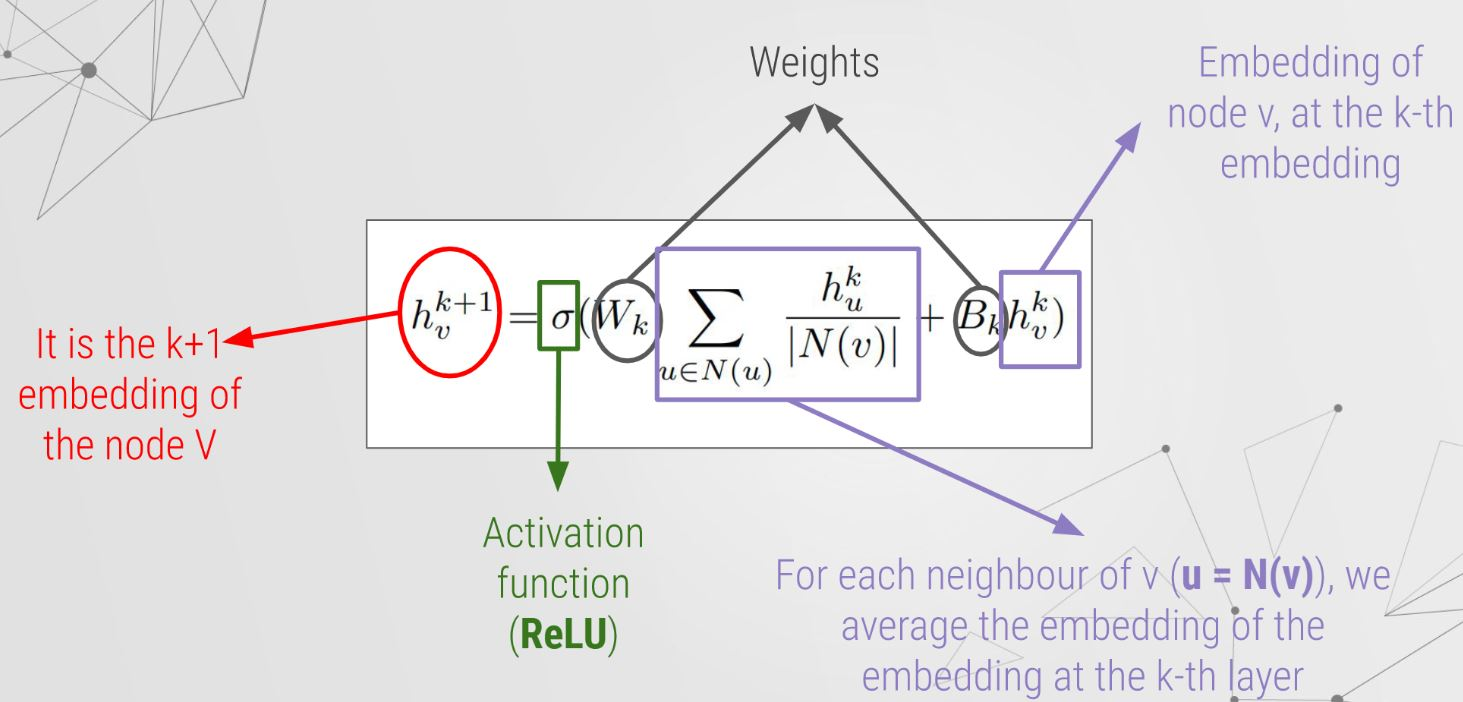

### GAT
This intoduced first in the paper [Graph Attention network](https://arxiv.org/abs/1710.10903). Here instead of doing simple average where all the neighbors information aggregated equally. We will gave score between 0 to 1 like how important that neighbor infomation to the current node.


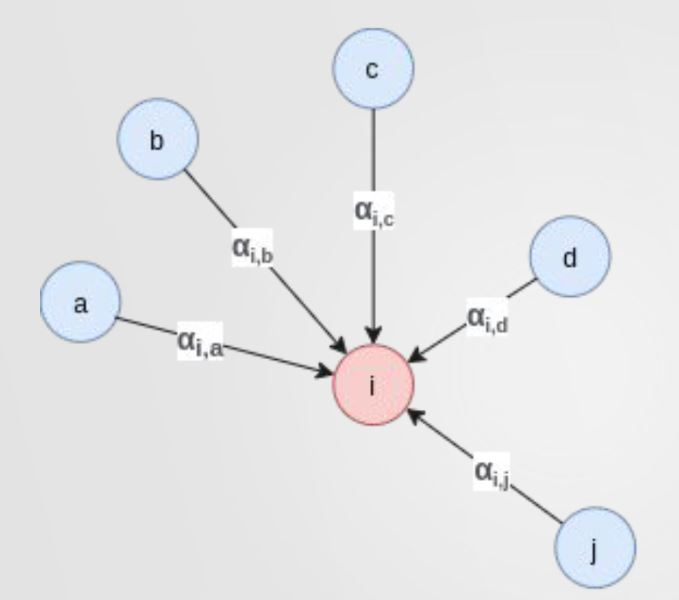

- W is the learnable weight matrices and a is the learnable weight vector.
- Can do Average or Concatenation between W.hi & W.hj.

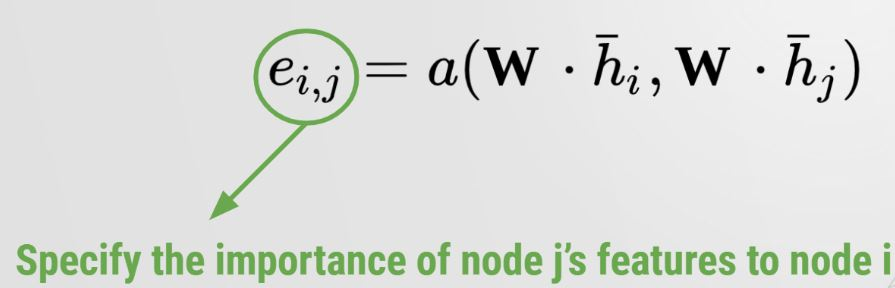

Do the softmax normalization to convert these scores between the range of 0 to 1.

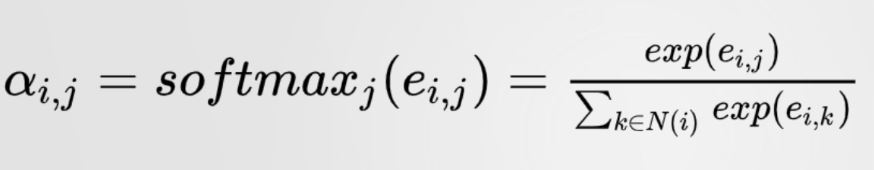

## **MLP**

In [ ]:
import torch
from torch.nn import Linear
import torch.nn.functional as F


class MLP(torch.nn.Module):
    def __init__(self, hidden_channels):
        super().__init__()
        torch.manual_seed(12345)
        self.lin1 = Linear(dataset.num_features, hidden_channels)
        self.lin2 = Linear(hidden_channels, dataset.num_classes)

    def forward(self, x):
        x = self.lin1(x)
        x = x.relu()
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.lin2(x)
        return x

model = MLP(hidden_channels=16)
print(model)

MLP(
  (lin1): Linear(in_features=1433, out_features=16, bias=True)
  (lin2): Linear(in_features=16, out_features=7, bias=True)
)


In [ ]:
data = dataset[0]

### Visualize Features

In [ ]:
from sklearn.manifold import TSNE

def visualize(h, color):
    z = TSNE(n_components=2).fit_transform(h.detach().cpu().numpy())

    plt.figure(figsize=(10,10))
    plt.xticks([])
    plt.yticks([])

    plt.scatter(z[:, 0], z[:, 1], s=70, c=color, cmap="Set2")
    plt.show()

MLP(
  (lin1): Linear(in_features=1433, out_features=16, bias=True)
  (lin2): Linear(in_features=16, out_features=7, bias=True)
)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


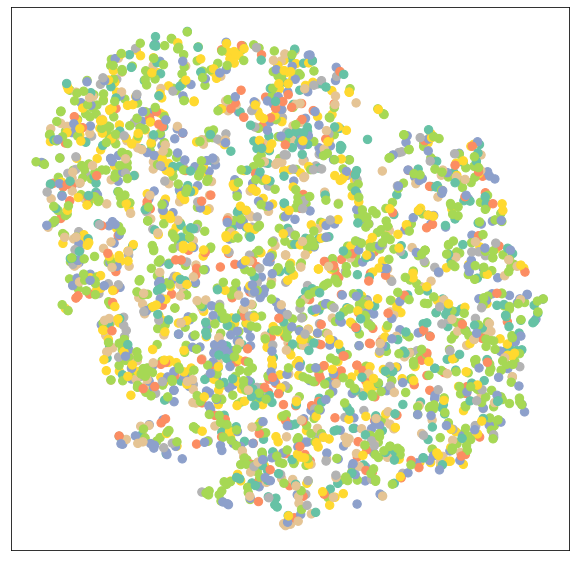

In [ ]:
model = MLP(hidden_channels=16)
model.eval()

out = model(cora[0].x)
visualize(out, color=cora[0].y)

### Training

In [ ]:
from IPython.display import Javascript  # Restrict height of output cell.
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))
model = MLP(hidden_channels=16)
criterion = torch.nn.CrossEntropyLoss()  # Define loss criterion.
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)  # Define optimizer.

def train():
      model.train()
      optimizer.zero_grad()  # Clear gradients.
      out = model(data.x)  # Perform a single forward pass.
      loss = criterion(out[data.train_mask], data.y[data.train_mask])  # Compute the loss solely based on the training nodes.
      loss.backward()  # Derive gradients.
      optimizer.step()  # Update parameters based on gradients.
      return loss

def test():
      model.eval()
      out = model(data.x)
      pred = out.argmax(dim=1)  # Use the class with highest probability.
      test_correct = pred[data.test_mask] == data.y[data.test_mask]  # Check against ground-truth labels.
      test_acc = int(test_correct.sum()) / int(data.test_mask.sum())  # Derive ratio of correct predictions.
      return test_acc

for epoch in range(1, 201):
    loss = train()
    print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}')

<IPython.core.display.Javascript object>

Epoch: 001, Loss: 1.9620
Epoch: 002, Loss: 1.9028
Epoch: 003, Loss: 1.8414
Epoch: 004, Loss: 1.7562
Epoch: 005, Loss: 1.6390
Epoch: 006, Loss: 1.5614
Epoch: 007, Loss: 1.4282
Epoch: 008, Loss: 1.3505
Epoch: 009, Loss: 1.2642
Epoch: 010, Loss: 1.1786
Epoch: 011, Loss: 1.0887
Epoch: 012, Loss: 0.9626
Epoch: 013, Loss: 0.9238
Epoch: 014, Loss: 0.8177
Epoch: 015, Loss: 0.7710
Epoch: 016, Loss: 0.6766
Epoch: 017, Loss: 0.6483
Epoch: 018, Loss: 0.5992
Epoch: 019, Loss: 0.5322
Epoch: 020, Loss: 0.5321
Epoch: 021, Loss: 0.4861
Epoch: 022, Loss: 0.5026
Epoch: 023, Loss: 0.4680
Epoch: 024, Loss: 0.4276
Epoch: 025, Loss: 0.3171
Epoch: 026, Loss: 0.3861
Epoch: 027, Loss: 0.3429
Epoch: 028, Loss: 0.3349
Epoch: 029, Loss: 0.3290
Epoch: 030, Loss: 0.3381
Epoch: 031, Loss: 0.3494
Epoch: 032, Loss: 0.2594
Epoch: 033, Loss: 0.3263
Epoch: 034, Loss: 0.2667
Epoch: 035, Loss: 0.3240
Epoch: 036, Loss: 0.3576
Epoch: 037, Loss: 0.3447
Epoch: 038, Loss: 0.2687
Epoch: 039, Loss: 0.2610
Epoch: 040, Loss: 0.2472


### Testing

In [ ]:
test_acc = test()
print(f'Test Accuracy: {test_acc:.4f}')

Test Accuracy: 0.5830


MLP(
  (lin1): Linear(in_features=1433, out_features=16, bias=True)
  (lin2): Linear(in_features=16, out_features=7, bias=True)
)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


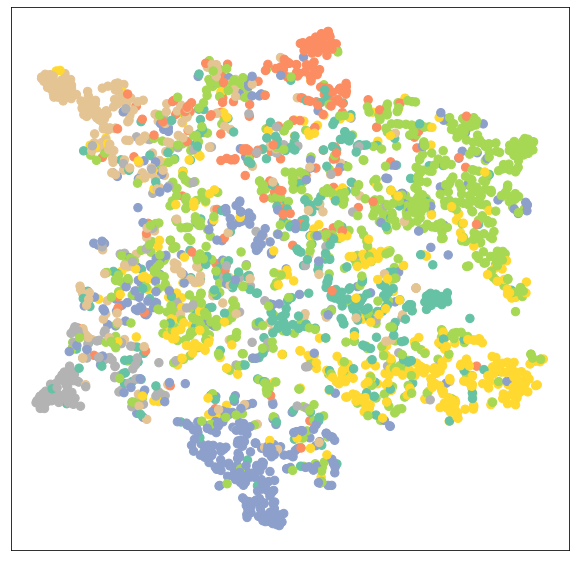

In [ ]:
model.eval()

out = model(data.x)
visualize(out, color=data.y)

## **GNN**

In [ ]:
from torch_geometric.nn import SAGEConv,GAT,GATConv
import torch.nn.functional as F
torch.manual_seed(42)

In [ ]:
class Gnn(torch.nn.Module):
  def __init__(self,hidden_channels):
    super(Gnn, self).__init__()
    self.conv1 = SAGEConv(dataset.num_features,hidden_channels,aggr='mean') #mean,max,min,add
    self.gat = GATConv(hidden_channels,dataset.num_classes,heads=6)
  
  def forward(self, x, edge_index):
    x = self.conv1(x, edge_index)
    x = x.relu()
    x = F.dropout(x, p=0.5, training=self.training)
    x = self.gat(x,edge_index)
    return x

In [ ]:
dataset = cora
model = Gnn(hidden_channels=16)
print(model)

Gnn(
  (conv1): SAGEConv(1433, 16, aggr=mean)
  (gat): GATConv(16, 7, heads=6)
)


### Training

In [ ]:
def train(num_epoch,model):
  optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)
  losses = torch.nn.CrossEntropyLoss()
  for epoch in range(num_epoch):
    model.train()
    optimizer.zero_grad()  # Clear gradients.
    out = model(data.x, data.edge_index)  # Perform a single forward pass.
    loss = losses(out[data.train_mask], data.y[data.train_mask])  # Compute the loss solely based on the training nodes.
    loss.backward()  # Derive gradients.
    optimizer.step()  # Update parameters based on gradients.
    print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}')

def test(model):
      model.eval()
      out = model(data.x, data.edge_index)
      pred = out.argmax(dim=1)  # Use the class with highest probability.
      test_correct = pred[data.test_mask] == data.y[data.test_mask]  # Check against ground-truth labels.
      test_acc = int(test_correct.sum()) / int(data.test_mask.sum())  # Derive ratio of correct predictions.
      return test_acc

In [ ]:
data = dataset[0]
train(100,model)

Epoch: 000, Loss: 3.7358
Epoch: 001, Loss: 3.5259
Epoch: 002, Loss: 3.1972
Epoch: 003, Loss: 2.8306
Epoch: 004, Loss: 2.4680
Epoch: 005, Loss: 2.0612
Epoch: 006, Loss: 1.7021
Epoch: 007, Loss: 1.5511
Epoch: 008, Loss: 1.3519
Epoch: 009, Loss: 1.1381
Epoch: 010, Loss: 0.8676
Epoch: 011, Loss: 0.7846
Epoch: 012, Loss: 0.7240
Epoch: 013, Loss: 0.6234
Epoch: 014, Loss: 0.5089
Epoch: 015, Loss: 0.4627
Epoch: 016, Loss: 0.4815
Epoch: 017, Loss: 0.3810
Epoch: 018, Loss: 0.3549
Epoch: 019, Loss: 0.3308
Epoch: 020, Loss: 0.3215
Epoch: 021, Loss: 0.2326
Epoch: 022, Loss: 0.2309
Epoch: 023, Loss: 0.1778
Epoch: 024, Loss: 0.2036
Epoch: 025, Loss: 0.2125
Epoch: 026, Loss: 0.1809
Epoch: 027, Loss: 0.1615
Epoch: 028, Loss: 0.1482
Epoch: 029, Loss: 0.1113
Epoch: 030, Loss: 0.1317
Epoch: 031, Loss: 0.1106
Epoch: 032, Loss: 0.0856
Epoch: 033, Loss: 0.1343
Epoch: 034, Loss: 0.0782
Epoch: 035, Loss: 0.0917
Epoch: 036, Loss: 0.0668
Epoch: 037, Loss: 0.0901
Epoch: 038, Loss: 0.0764
Epoch: 039, Loss: 0.0643


### Testing

In [ ]:
test_acc = test(model)
print(f'Test Accuracy: {test_acc:.4f}')

Test Accuracy: 0.7910


Now, the output embeddings of our trained model produces a far better clustering of nodes of the same category.

Gnn(
  (conv1): SAGEConv(1433, 16, aggr=mean)
  (gat): GATConv(16, 7, heads=6)
)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


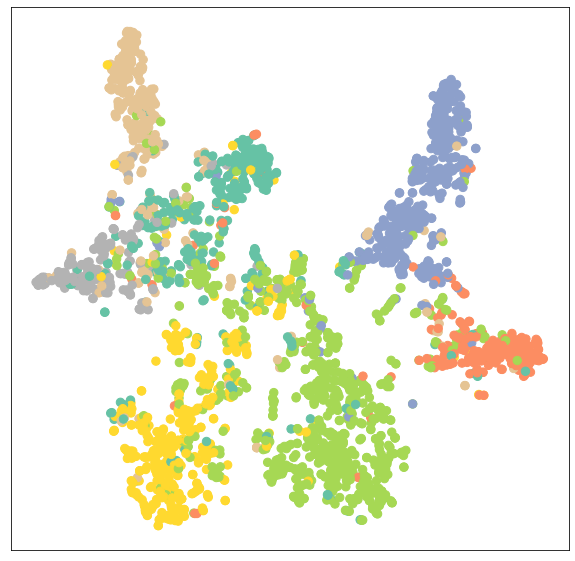

In [ ]:
model.eval()

out = model(data.x, data.edge_index)
visualize(out, color=data.y)

## **GNN Custom Model**

### Define Layer

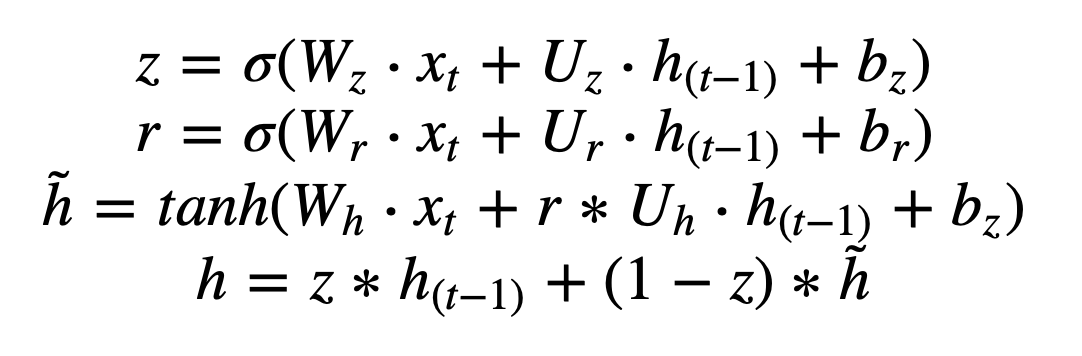

In [ ]:
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
from torch_geometric.utils import remove_self_loops,add_self_loops
class MyGRU(torch_geometric.nn.MessagePassing):
  def __init__(self,in_channels,out_channels,hidden_channel):
    super(MyGRU,self).__init__(aggr='mean')
    self.lin = torch.nn.Linear(in_channels, out_channels,bias=True)
    self.act = torch.nn.ReLU()
    self.update_lin = torch.nn.Linear(in_channels ,out_channels,bias=False)
    self.update_act = torch.nn.ReLU()
    # Update gate parameters
    self.W_xz = torch.nn.init.xavier_uniform_(torch.empty(in_channels, hidden_channel, requires_grad=True,device=device), gain=torch.nn.init.calculate_gain('relu'))
    self.W_hz = torch.nn.init.xavier_uniform_(torch.empty(in_channels, hidden_channel, requires_grad=True,device=device), gain=torch.nn.init.calculate_gain('relu'))
    self.b_z = torch.zeros(hidden_channel, requires_grad=True,device=device)
    # Reset gate parameters
    self.W_xr = torch.nn.init.xavier_uniform_(torch.empty(in_channels, hidden_channel, requires_grad=True,device=device), gain=torch.nn.init.calculate_gain('relu'))
    self.W_hr = torch.nn.init.xavier_uniform_(torch.empty(in_channels, hidden_channel, requires_grad=True,device=device), gain=torch.nn.init.calculate_gain('relu'))
    self.b_r = torch.zeros(hidden_channel, requires_grad=True,device=device)
    # Candidate hidden state parameters
    self.W_xh = torch.nn.init.xavier_uniform_(torch.empty(in_channels, hidden_channel, requires_grad=True,device=device), gain=torch.nn.init.calculate_gain('relu'))
    self.W_hh = torch.nn.init.xavier_uniform_(torch.empty(in_channels, hidden_channel, requires_grad=True,device=device), gain=torch.nn.init.calculate_gain('relu'))
    self.b_h = torch.zeros(hidden_channel, requires_grad=True,device=device)
    # Output layer parameters
    self.W_hq = torch.nn.init.xavier_uniform_(torch.empty(hidden_channel, out_channels, requires_grad=True,device=device), gain=torch.nn.init.calculate_gain('relu'))
    self.b_q = torch.zeros(out_channels, requires_grad=True,device=device)
  
  def forward(self,x,edge_index):
    # x has shape [N, in_channels]
    # edge_index has shape [2, E]
    edge_index, _ = remove_self_loops(edge_index)
    edge_index, _ = add_self_loops(edge_index, num_nodes=x.size(0))
    return self.propagate(edge_index, size=(x.size(0), x.size(0)), x=x)
  
  def message(self,x_i,x_j):
    # x_j has shape [E, in_channels]
    Z = torch.sigmoid((x_i @ self.W_xz) + (x_j @ self.W_hz) + self.b_z)
    R = torch.sigmoid((x_i @ self.W_xr) + (x_j @ self.W_hr) + self.b_r)
    H_tilda = torch.tanh((x_i @ self.W_xh) + ((R * x_j) @ self.W_hh) + self.b_h)
    x_j = Z * x_j + (1-Z) * H_tilda
    x_j = x_j @ self.W_hq + self.b_q
    #x_j = self.lin(x_j)
    #x_j = self.act(x_j)
    return x_j
  
  def update(self, aggr_out, x):
    # aggr_out has shape [N, out_channels]
    new_embed = self.update_lin(x)
    #aggr_out = self.lin(aggr_out)
    #print(aggr_out.shape , new_embed.shape)
    new_embed = torch.add(aggr_out,new_embed)
    #new_embed = self.update_lin(new_embed)
    new_embed = self.update_act(new_embed)
    return new_embed

Self.propagate will do the following:

- execute self.message, $\phi$: construct the message of node pairs (x_i, x_j)
- execute self.aggregate, aggregate message from neigbors.

In [ ]:
torch.nn.init.xavier_uniform_(torch.nn.Linear(5 ,3,bias=False).weight)

Parameter containing:
tensor([[ 0.5028, -0.7174, -0.7929, -0.7595, -0.6589],
        [ 0.5124,  0.7288,  0.0419, -0.0405,  0.7156],
        [ 0.8072, -0.2984, -0.3736,  0.6888, -0.2084]], requires_grad=True)

### Model

In [ ]:
class Gnn_new(torch.nn.Module):
  def __init__(self,hidden_channels,dropout):
    super(Gnn_new, self).__init__()
    self.conv1 = MyGRU(dataset.num_features,hidden_channels,1433) #mean,max,min,add
    self.gat = GATConv(hidden_channels,dataset.num_classes,heads=6)
    self.dropout = dropout
  
  def forward(self, x, edge_index):
    x = F.dropout(x, self.dropout, training=self.training)
    x = self.conv1(x, edge_index)
    x = x.relu()
    x = F.dropout(x, self.dropout, training=self.training)
    x = self.gat(x,edge_index)
    return x.log_softmax(dim=-1)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
dataset = cora
model = Gnn_new(hidden_channels=16,dropout=0.6).to(device)
print(model)

Gnn_new(
  (conv1): MyGRU()
  (gat): GATConv(16, 7, heads=6)
)


### Training

In [ ]:
data = dataset[0]
train(100,model)

Epoch: 000, Loss: 3.7274
Epoch: 001, Loss: 3.6194
Epoch: 002, Loss: 3.5237
Epoch: 003, Loss: 3.3867
Epoch: 004, Loss: 3.1852
Epoch: 005, Loss: 3.0566
Epoch: 006, Loss: 2.8561
Epoch: 007, Loss: 2.6141
Epoch: 008, Loss: 2.4233
Epoch: 009, Loss: 2.2000
Epoch: 010, Loss: 2.0199
Epoch: 011, Loss: 1.8506
Epoch: 012, Loss: 1.8787
Epoch: 013, Loss: 1.5596
Epoch: 014, Loss: 1.5070
Epoch: 015, Loss: 1.4610
Epoch: 016, Loss: 1.3671
Epoch: 017, Loss: 1.3727
Epoch: 018, Loss: 1.2196
Epoch: 019, Loss: 1.2361
Epoch: 020, Loss: 1.1899
Epoch: 021, Loss: 1.1547
Epoch: 022, Loss: 0.9868
Epoch: 023, Loss: 1.0749
Epoch: 024, Loss: 1.0058
Epoch: 025, Loss: 0.9499
Epoch: 026, Loss: 0.9597
Epoch: 027, Loss: 0.7508
Epoch: 028, Loss: 0.8217
Epoch: 029, Loss: 0.7251
Epoch: 030, Loss: 0.7772
Epoch: 031, Loss: 0.7481
Epoch: 032, Loss: 0.6711
Epoch: 033, Loss: 0.6041
Epoch: 034, Loss: 0.5490
Epoch: 035, Loss: 0.5934
Epoch: 036, Loss: 0.6367
Epoch: 037, Loss: 0.6053
Epoch: 038, Loss: 0.4600
Epoch: 039, Loss: 0.6358


### Testing

In [ ]:
test_acc = test(model)
print(f'Test Accuracy: {test_acc:.4f}')

Test Accuracy: 0.7950


Gnn_new(
  (conv1): MyGRU()
  (gat): GATConv(16, 7, heads=6)
)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


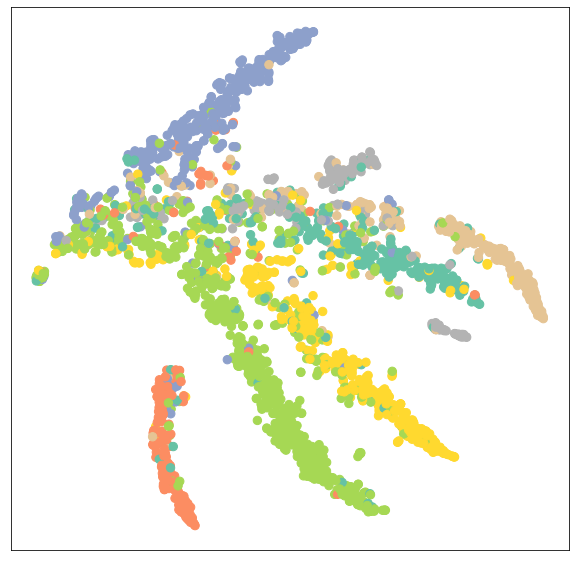

In [ ]:
model.eval()

out = model(data.x, data.edge_index)
visualize(out, color=data.y)

## **References & Resources**





### Courses

- [CSE640 UB Graph Mining Course](https://sariyuce.com/S22-640.html)
- [CSE705 UB Gnn Seminar Course](https://engineering.buffalo.edu/computer-science-engineering/graduate/courses/special-topics.html)
- [CS224W Stanford Graph NN Course](https://www.youtube.com/playlist?list=PLoROMvodv4rPLKxIpqhjhPgdQy7imNkDn)
- [DeepMind Geometric Deep learning](https://geometricdeeplearning.com/lectures/)

### Tutorials

- [MIT Graph Reading Group  (Monday 11Am)](https://hannes-stark.com/logag-reading-group)
- [Pytorch Geometric Tutorial Youtube](https://www.youtube.com/playlist?list=PLGMXrbDNfqTzqxB1IGgimuhtfAhGd8lHF)
- [Pytorch Geometric Unofficial Tutorial](https://github.com/AntonioLonga/PytorchGeometricTutorial)
- [Google Research Gnn Blog](https://distill.pub/2021/gnn-intro/)

### Libraries

- [Pytorch Geometric Official Tutorial](https://pytorch-geometric.readthedocs.io/en/latest/notes/colabs.html)
- [Tensorflow Gnn](https://github.com/tensorflow/gnn)
- [Networkx Official Doc](https://networkx.org/documentation/stable/tutorial.html)
- [Networkx Examples](http://snap.stanford.edu/class/cs224w-2011/nx_tutorial/nx_tutorial.pdf)

### Paper

- [Drug Repurposing Survey Paper](https://github.com/lucky630/Paper/blob/main/Drug_Repurposing_Through_GML_For_COVID_19.pdf)

## **End**

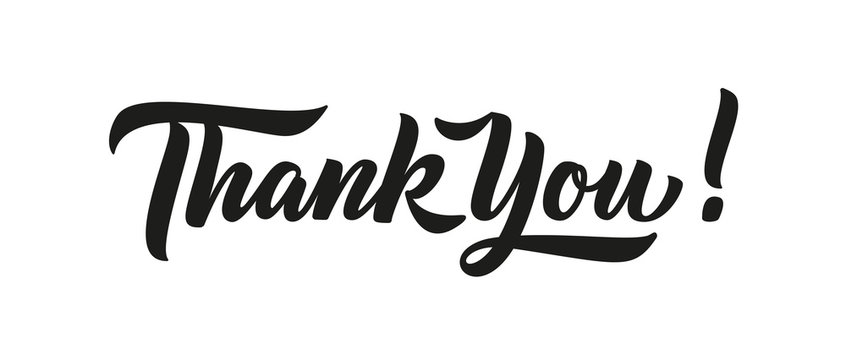